In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

## Explore preprocessed letter data

In [2]:
data = loadmat('data/dna.mat')
train_data = data['train_data']/255.
train_labels = data['train_labels'][0].astype(np.uint8)
test_data = data['test_data']/255.
test_labels = data['test_labels'][0].astype(np.uint8)

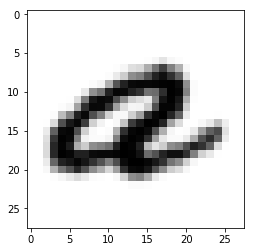

In [3]:
plt.imshow(test_data[2000], cmap=plt.cm.binary)
plt.show()

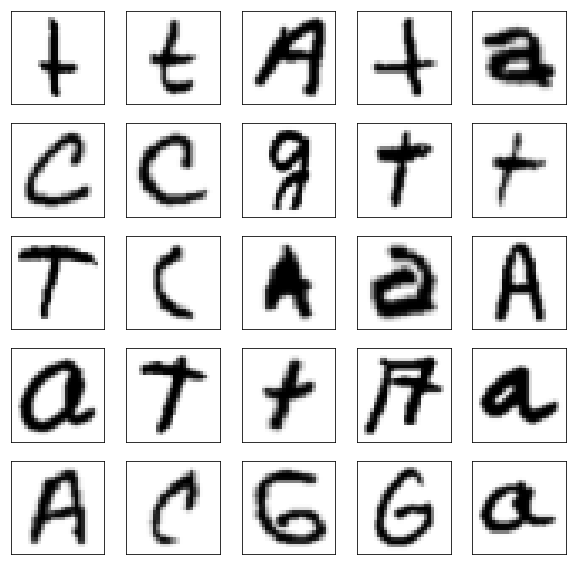

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data['test_data'][np.random.randint(len(data['test_data']))], cmap=plt.cm.binary)
plt.show()

## Fully-connected network

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(4, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

W0418 10:03:18.290292 140380776888064 deprecation.py:506] From /home/jordi/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/init_ops.py:1257: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
# test the model before training
_, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

10454/10454 [==============================] - 0s 40us/sample - loss: 1.3940 - acc: 0.2811
Test accuracy: 0.2811364


In [7]:
model.fit(train_data, train_labels, epochs=5)

Epoch 1/5
63674/63674 [==============================] - 3s 52us/sample - loss: 0.1344 - acc: 0.9578
Epoch 2/5
63674/63674 [==============================] - 3s 53us/sample - loss: 0.0666 - acc: 0.9790
Epoch 3/5
63674/63674 [==============================] - 3s 52us/sample - loss: 0.0518 - acc: 0.9838
Epoch 4/5
63674/63674 [==============================] - 3s 52us/sample - loss: 0.0431 - acc: 0.9859
Epoch 5/5
63674/63674 [==============================] - 3s 52us/sample - loss: 0.0370 - acc: 0.9888


In [8]:
_, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

10454/10454 [==============================] - 0s 28us/sample - loss: 0.0596 - acc: 0.9827
Test accuracy: 0.98268604


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 516       
Total params: 100,996
Trainable params: 100,996
Non-trainable params: 0
_________________________________________________________________


## Adding convolutional layers

In [10]:
model_conv = keras.Sequential([
    keras.layers.Conv2D(28, kernel_size=(3,3), input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(4, activation=tf.nn.softmax)
])

model_conv.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model_conv.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               605824    
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 516       
Total params: 606,620
Trainable params: 606,620
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_conv.fit(train_data.reshape(-1,28,28,1), train_labels, epochs=5)

Epoch 1/5
63674/63674 [==============================] - 5s 80us/sample - loss: 0.1101 - acc: 0.9652
Epoch 2/5
63674/63674 [==============================] - 5s 77us/sample - loss: 0.0506 - acc: 0.9845
Epoch 3/5
63674/63674 [==============================] - 5s 73us/sample - loss: 0.0368 - acc: 0.9891
Epoch 4/5
63674/63674 [==============================] - 5s 72us/sample - loss: 0.0281 - acc: 0.9911
Epoch 5/5
63674/63674 [==============================] - 5s 72us/sample - loss: 0.0216 - acc: 0.9933


In [14]:
_, test_acc = model_conv.evaluate(test_data.reshape(-1,28,28,1), test_labels)
print('Test accuracy:', test_acc)

10454/10454 [==============================] - 0s 32us/sample - loss: 0.0601 - acc: 0.9842
Test accuracy: 0.9842166


## Explore predictions

In [57]:
predictions = model.predict(test_data)

In [58]:
predictions[0]

array([9.9822968e-01, 2.1721419e-06, 1.0019927e-03, 7.6618744e-04],
      dtype=float32)

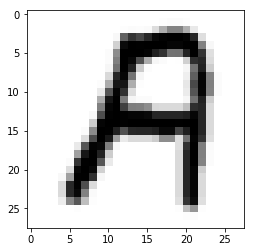

In [59]:
plt.imshow(test_data[0], cmap=plt.cm.binary)
plt.savefig('big_c.pdf')
plt.show()